# Proyecto Covid-19 Analítica Predictiva. 

### Angie Eslava, Saul Hernandez,  Steven Salgado




<img src="https://www.paho.org/sites/default/files/styles/flexslider_full/public/2020-03/blue-covid-banner.jpg?h=96546727&itok=cZemcbKa" width="5000" height="400" />

## Índice




*   [Introducción](#scrollTo=IwNOfcM7Wuke&line=1&uniqifier=1)
*   [Problema real y problema de analítica](#scrollTo=NZdhvI-Pd7fh)
*   [Importando librerias](#scrollTo=5P2b0fO23ucj&line=1&uniqifier)
*   [Carga de datos desde la API](#scrollTo=VCCzpQM7Bl-z)
*   [Limpieza de datos](#scrollTo=z_ILLZDega3B)
*   [Creación de un subset asociado a las cinco ciudades principales](#scrollTo=sKbSDXg8JGr6&line=1&uniqifier=1)
*   [Análisis exploratorio de dataset de ciudades](#scrollTo=vawLFxhF4KrF&line=1&uniqifier=1)
*   [Dataset y análisis exploratorio de fallecidos
](#scrollTo=rH64uJ5FFeeN)
*   [Dataset y modelado para predicción](#scrollTo=dUO_MgMYTdgQ&line=1&uniqifier=1)
*   [Predicción por día](#scrollTo=K7pMILDv6NkK&line=2&uniqifier=1)
*   [Predicción por semana](#scrollTo=ILe_9uJf6dsf&line=1&uniqifier=1)
*   [Conclusiones](#scrollTo=uAm1Tk6b_SkR&line=4&uniqifier=1)

## Introducción



En el mundo actual, la pandemia causada por el Covid-19 es y será por mucho tiempo el tema mas comentado e importante. Colombia no ha sido extraño a este fenómeno que afecta hoy la vida de millones de colombianos a través de toda la región. En este trabajo nos enfrentamos a la tarea de abordar la enfermedad desde los datos.

Se usan los datos otorgados por el gobierno colombiano [(click aquí)](https://www.datos.gov.co/Salud-y-Protecci-n-Social/Casos-positivos-de-COVID-19-en-Colombia/gt2j-8ykr/data) para realizar una análisis exploratorio de datos y conocer como se está comportando la pandemia, así como para producir una serie de tiempo a partir de la cual se predice el comportamiento de la mortalidad de la pandemia.







## Problema Real y Problema de Analítica

**Problema real** : La tasa de fallecimientos en la pandemia ha ido aumentando a través del tiempo, y resulta un riesgo para la salud de los colombianos

**Problema de Analítica** : Predecir la cantidad de fallecidos en los proximos días para conocer el comportamiento a futuro de la mortalidad de la pandemia en Colombia 

(Estos cálculos se realizan con base a un set de datos asociado a las cinco ciudades mas grandes de Colombia, las cuales se encuentran afectadas en mayor parte por el Covid -19)

## Importando Librerias

Se inicia con el importe de las librerias de python que se utilizarán para realizar en análisis de los datos

In [ ]:
pip install sodapy


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime , timedelta
import matplotlib.pyplot as plt
from sodapy import Socrata


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Carga de datos desde la API

In [ ]:
# Definición del cliente de donde se tomará la información
#client = Socrata("www.datos.gov.co", None)
client = Socrata("www.datos.gov.co",
                  '5aJ1DExqkSA79jE4S3I27ZMyL',
                  username="egangiest@gmail.com",
                  password="5aJ1DExqkSA79jE4S3I27ZMyL")
# Cuenta de apitoken: https://opendata.socrata.com/es/profile/edit/developer_settings

# Definición de la pagina API y la documentación. 
# API-page: https://dev.socrata.com/foundry/www.datos.gov.co/gt2j-8ykr
# documentacion: https://dev.socrata.com/consumers/getting-started.html


# Se establece la información retirada, se pone un limite alto de toma de información debido 
# a que el dataset seguirá aumentando mientras pase tiempo 
#results = client.get("gt2j-8ykr", limit=1000000)
results = client.get("gt2j-8ykr", limit=1000000)

#Se convierte a un dataset de Pandas. 
Dataset1 = pd.DataFrame.from_records(results)

## Limpieza de datos

 Para hacer la revisión inicial y posterior limpieza de los datos, se inicia viendo que contiene el dataset inicial, que columnas resultan irrelevantes, y en las columnas relevantes, que datos se encuentran equivocados

In [ ]:
Dataset1.head()

,id_de_caso,fecha_de_notificaci_n,c_digo_divipola,ciudad_de_ubicaci_n,departamento,atenci_n,edad,sexo,tipo,estado,pa_s_de_procedencia,fis,fecha_diagnostico,fecha_recuperado,fecha_reporte_web,tipo_recuperaci_n,codigo_departamento,codigo_pais,pertenencia_etnica,nombre_grupo_etnico,fecha_de_muerte
0,1,2020-03-02T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Recuperado,19,F,Importado,Leve,ITALIA,2020-02-27T00:00:00.000,2020-03-06T00:00:00.000,2020-03-13T00:00:00.000,2020-03-06T00:00:00.000,PCR,11,380,Otro,NaN,NaN
1,2,2020-03-06T00:00:00.000,76111,Guadalajara de Buga,Valle del Cauca,Recuperado,34,M,Importado,Leve,ESPAÑA,2020-03-04T00:00:00.000,2020-03-09T00:00:00.000,2020-03-19T00:00:00.000,2020-03-09T00:00:00.000,PCR,76,724,Otro,NaN,NaN
2,3,2020-03-07T00:00:00.000,05001,Medellín,Antioquia,Recuperado,50,F,Importado,Leve,ESPAÑA,2020-02-29T00:00:00.000,2020-03-09T00:00:00.000,2020-03-15T00:00:00.000,2020-03-09T00:00:00.000,PCR,5,724,Otro,NaN,NaN
3,4,2020-03-09T00:00:00.000,05001,Medellín,Antioquia,Recuperado,55,M,Relacionado,Leve,NaN,2020-03-06T00:00:00.000,2020-03-11T00:00:00.000,2020-03-26T00:00:00.000,2020-03-11T00:00:00.000,PCR,5,NaN,Otro,NaN,NaN
4,5,2020-03-09T00:00:00.000,05001,Medellín,Antioquia,Recuperado,25,M,Relacionado,Leve,NaN,2020-03-08T00:00:00.000,2020-03-11T00:00:00.000,2020-03-23T00:00:00.000,2020-03-11T00:00:00.000,PCR,5,NaN,Otro,NaN,NaN


In [ ]:
Dataset1.shape

(658456, 21)

In [ ]:
Dataset1.describe()

,id_de_caso,fecha_de_notificaci_n,c_digo_divipola,ciudad_de_ubicaci_n,departamento,atenci_n,edad,sexo,tipo,estado,pa_s_de_procedencia,fis,fecha_diagnostico,fecha_recuperado,fecha_reporte_web,tipo_recuperaci_n,codigo_departamento,codigo_pais,pertenencia_etnica,nombre_grupo_etnico,fecha_de_muerte
count,658456,658456,658456,658456,658456,658456,658456,658456,658456,658456,965,658456,654476,507775,658456,507770,658456,961,283455,11325,22507
unique,658456,186,1029,955,37,6,110,4,7,6,50,631,182,175,181,2,33,43,4,1289,169
top,576769,2020-07-27T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Recuperado,30,M,En estudio,Leve,ESPAÑA,Asintomático,2020-08-11T00:00:00.000,2020-08-23T00:00:00.000,2020-08-19T00:00:00.000,Tiempo,11,724,Otro,Sin Comunidad,2020-07-30T00:00:00.000
freq,1,12111,223522,223522,223522,507770,17588,337365,625842,533699,265,79542,17466,14151,13056,411168,223522,265,252661,2829,374


In [ ]:
Dataset1.dtypes

id_de_caso               object
fecha_de_notificaci_n    object
c_digo_divipola          object
ciudad_de_ubicaci_n      object
departamento             object
atenci_n                 object
edad                     object
sexo                     object
tipo                     object
estado                   object
pa_s_de_procedencia      object
fis                      object
fecha_diagnostico        object
fecha_recuperado         object
fecha_reporte_web        object
tipo_recuperaci_n        object
codigo_departamento      object
codigo_pais              object
pertenencia_etnica       object
nombre_grupo_etnico      object
fecha_de_muerte          object
dtype: object

En primera instancia se pueden encontrar los siguientes inconvenientes

*   Los nombres de las columnas tienen inconvenientes
*   Las fechas cuentan con valores tipo str que contienen además una sección de hora, que no es de utilidad
*   La columna de edad es tipo objeto, cuando debería ser tipo **int**
*   Ciertas columnas resultan irrelevantes para el procedimiento a realizar
*   El orden no está hecho sobre las fechas (temporalmente)


---


A continuación se le da solución a estos puntos:




In [ ]:
#Cambiando los nombres de las columnas

Dataset1.columns = ['ID de caso', 'Fecha de notificación', 'Código DIVIPOLA', 'Ciudad de ubicación',
       'Departamento o Distrito ', 'Atención', 'Edad', 'Sexo', 'Tipo',
       'Estado', 'País de procedencia', 'FIS', 'Fecha de muerte',
       'Fecha diagnostico', 'Fecha recuperado', 'fecha reporte web',
       'Tipo recuperación', 'Codigo departamento', 'Codigo pais',
       'Pertenencia etnica', 'Nombre grupo etnico']

In [ ]:
# Limpieza de las columnas con fechas, para eliminar la hora.

Fechas = ['Fecha de notificación', 'Fecha de muerte' , 'Fecha diagnostico' , 'Fecha recuperado' ]

for i in Fechas:
  Dataset1[i] = Dataset1[i].apply(lambda x: str(x).split('T')[0])

# Conversión de las fechas a tipo fecha (datetime de Pandas)

for i in Fechas:
  Dataset1[i]= pd.to_datetime(Dataset1[i])

In [ ]:
# Cambiando la columna edad de tipo str a tipo int

Dataset1['Edad'] = Dataset1['Edad'].astype(int)

In [ ]:
# Eliminando columnas que se consideran innecesarias
Dataset1.drop(columns = ['ID de caso', 'Código DIVIPOLA' ,'Departamento o Distrito ', 'FIS' , 'Codigo departamento' , 'fecha reporte web' , 'Codigo pais' , 'Codigo departamento' , 'Codigo pais',
               'Pertenencia etnica', 'Nombre grupo etnico'] , inplace = True)

In [ ]:
 # Ordenando el dataset segun la fecha de notificación

 Dataset1 = Dataset1.sort_values(by=['Fecha de notificación']) 
 

Posteriormente se realiza una revisión de los datos en las columnas, para verificar que sean consitentes

In [ ]:
# Se hace una revisión de los valores únicos de las siguientes columnas

Listacolumnas = ['Sexo', 'Atención' , 'Tipo', 'Estado' ]
for name in Listacolumnas:
  print("Valores únicos" , name ,  Dataset1[name].unique() )

Valores únicos Sexo ['F' 'M' 'm' 'f']
Valores únicos Atención ['Recuperado' 'Fallecido' 'N/A' 'Casa' 'Hospital' 'Hospital UCI']
Valores únicos Tipo ['Importado' 'Relacionado' 'En estudio' 'relacionado' 'RELACIONADO'
 'EN ESTUDIO' 'En Estudio']
Valores únicos Estado ['Leve' 'Fallecido' 'Asintomático' 'Moderado' 'Grave' 'N/A']


Se observa como hay valores inadecuados para las columnas Sexo y Tipo
A continuación se hace la solución de estos problemas

In [ ]:
# Corrección de minusculas de columna Sexo

Dataset1['Sexo'] = Dataset1['Sexo'].str.upper()

In [ ]:
# Corrección de minusculas de columna Tipo

Dataset1['Tipo'] = Dataset1['Tipo'].str.upper()

Se propone realizar una distribución de edad en la población en 5 categorías, que van desde Niño hasta Vejez

In [ ]:
# Función para definir categorias segun el rango de edad

def categoria_edad(edad):
    if edad <= 11:
        return('Niño')
    
    if 11 < edad <= 18:
        return('Adolescente')
    
    if 18 < edad <= 26:        
        return('Juventud')
    
    if 26 < edad <= 59:        
        return('Adulto')
    
    else:
        return('Vejez')

In [ ]:
# Creación de columna de categorias de edad
Dataset1['Cat_Edad'] = Dataset1['Edad'].apply(categoria_edad)


Se observa a continuación como queda el Dataset con la limpieza realizada

In [ ]:
Dataset1.head()

,Fecha de notificación,Ciudad de ubicación,Atención,Edad,Sexo,Tipo,Estado,País de procedencia,Fecha de muerte,Fecha diagnostico,Fecha recuperado,Tipo recuperación,Cat_Edad
0,2020-03-02,Bogotá D.C.,Recuperado,19,F,IMPORTADO,Leve,ITALIA,2020-03-06,2020-03-13,2020-03-06,11,Juventud
1,2020-03-06,Guadalajara de Buga,Recuperado,34,M,IMPORTADO,Leve,ESPAÑA,2020-03-09,2020-03-19,2020-03-09,76,Adulto
2,2020-03-07,Medellín,Recuperado,50,F,IMPORTADO,Leve,ESPAÑA,2020-03-09,2020-03-15,2020-03-09,5,Adulto
6,2020-03-08,Cartagena de Indias,Recuperado,85,F,IMPORTADO,Leve,ESTADOS UNIDOS,2020-03-11,2020-03-17,2020-03-11,13,Vejez
8,2020-03-08,Bogotá D.C.,Recuperado,28,F,IMPORTADO,Leve,ESPAÑA,2020-03-11,2020-03-23,2020-03-11,11,Adulto


## Creación de un Subset asociado a las cinco ciudades principales


Se crea un dataset que contenga información solo de las 5 ciudades de Colombia, estas se toman como las 5 ciudades con mayor cantidad de infección.

In [ ]:
Principales = ['Bogotá D.C.', 'Medellín' , 'Cali' ,
               'Barranquilla' , 'Cartagena de Indias' ]
Dataset_ciudades = Dataset1[Dataset1['Ciudad de ubicación'].isin(Principales)]

In [ ]:
Dataset_ciudades.head()

,Fecha de notificación,Ciudad de ubicación,Atención,Edad,Sexo,Tipo,Estado,País de procedencia,Fecha de muerte,Fecha diagnostico,Fecha recuperado,Tipo recuperación,Cat_Edad
0,2020-03-02,Bogotá D.C.,Recuperado,19,F,IMPORTADO,Leve,ITALIA,2020-03-06,2020-03-13,2020-03-06,11,Juventud
2,2020-03-07,Medellín,Recuperado,50,F,IMPORTADO,Leve,ESPAÑA,2020-03-09,2020-03-15,2020-03-09,5,Adulto
6,2020-03-08,Cartagena de Indias,Recuperado,85,F,IMPORTADO,Leve,ESTADOS UNIDOS,2020-03-11,2020-03-17,2020-03-11,13,Vejez
8,2020-03-08,Bogotá D.C.,Recuperado,28,F,IMPORTADO,Leve,ESPAÑA,2020-03-11,2020-03-23,2020-03-11,11,Adulto
3,2020-03-09,Medellín,Recuperado,55,M,RELACIONADO,Leve,NaN,2020-03-11,2020-03-26,2020-03-11,5,Adulto


In [ ]:
Dataset_ciudades.shape

(370777, 13)

In [ ]:
Dataset_ciudades.to_csv('data.csv', index=False)

## Análisis exploratorio de dataset de ciudades







A continuación se realiza un análisis exploratorio de datos mediante visualizaciones en Matplotlib.pyplot, para encontrar relaciones interesantes en los datos



---



---



En primera instancia se realiza una gráfica  para verificar la distribución del estado de los pacientes, agrupados por sexo, para ver como se comporta el virus en este aspecto

Se puede observar que la mayor cantidad de pacientes se encuentran recuperados, lo que es una buena señal sobre la letalidad del virus, ya que la mayor cantidad de los pacientes sobrevive el virus. Se observa también, que hay ligeramente más mujeres recuperadas, pero más hombres tanto fallecidos como en hospital

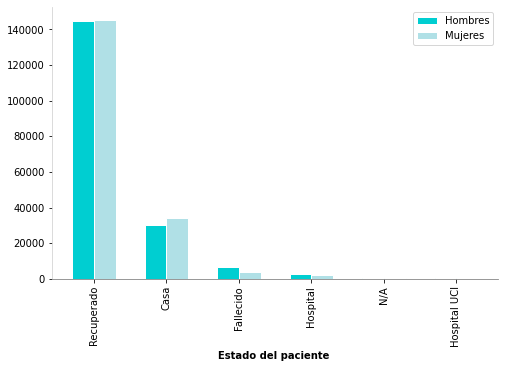

In [ ]:
# Estado actual de pacientes por sexo

Data_Female = Dataset_ciudades[Dataset_ciudades['Sexo'] == 'F']
Data_Male = Dataset_ciudades[Dataset_ciudades['Sexo'] == 'M']

#Ancho de las barras
bar_width = 0.30

#Valores de las barras
Barras_hombre = Data_Male['Atención'].value_counts()
Barras_mujer = Data_Female['Atención'].value_counts()

#Valores en el eje x
r1 = np.arange(len(Barras_hombre))
r2 = [x + bar_width for x in r1]

#Graficas
plt.bar(r1, Barras_hombre, color='darkturquoise',
        width=bar_width, edgecolor='white', 
        label='Hombres')
plt.bar(r2, Barras_mujer, color='powderblue', 
        width=bar_width, edgecolor='white', 
        label='Mujeres')

#Nombre eje x
plt.xlabel('Estado del paciente ', fontweight='bold')

#Reemplazo de los valores del eje x por los nombres de la columna Atención
plt.xticks([r + bar_width-0.15 for r in range(len(Barras_hombre))],
           Barras_hombre.index, rotation = 'vertical')

# Definición de tamaño de gráfica
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.gca().spines["left"].set_color("lightgray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
#Visualización
plt.legend()
plt.show()





---



---


Luego realizamos una distribución de cantidad de infectados por sexo, se observa que la distribución en las cinco ciudades es completamente equitativa entre hombres y mujeres, aunque se sabe que por literatura los hombres son un poco mas susceptibles a ser infectados


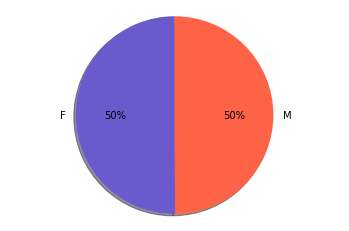

In [ ]:
# Distribucion por sexo de pacientes
tamaño = Dataset_ciudades['Sexo'].value_counts()
labels = Dataset_ciudades['Sexo'].value_counts().index
fig1, ax1 = plt.subplots()
ax1.pie(tamaño, labels=labels, autopct='%1.f%%',
        shadow=True, startangle=90, colors = ['slateblue' , 'tomato'])
ax1.axis('equal')  # Equal asegura que el diagrama sea circular.
plt.show()



---



---


Se revisa la distribución de infectados por ciudad, se encuentra una distribución acorde al tamaño poblacional de las ciudades, aunque Barranquilla esta bastante cerca de Cali, teniendo la primera la mitad de población que la segunda. 

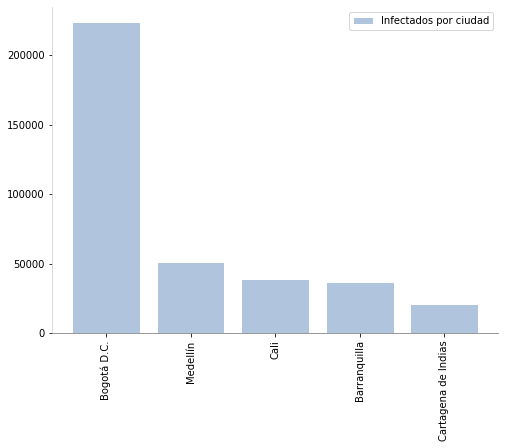

In [ ]:
# Ciudad de ubicación de pacientes
Data = Dataset_ciudades['Ciudad de ubicación'].value_counts()
r1 = np.arange(len(Data))
plt.bar(r1, Data, color='lightsteelblue', 
        edgecolor='white' , 
        label ='Infectados por ciudad')
plt.xticks([r for r in range(len(Data))] ,
           Data.index, rotation = 'vertical')
plt.legend()
plt.gca().spines["left"].set_color("lightgray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.show()




---



---


Se revisa la cantidad de infectados por rango de edad, se observa que la mayor cantidad de infectados se encuentra en la categoria de adulto, entre los rangos de edad de 26 a 59, esto puede asociarse a que a medida que incrementa la edad las personas son mas susceptibles al virus, ademas de que esta categoria es la que posee un mayor rango respecto a las demás

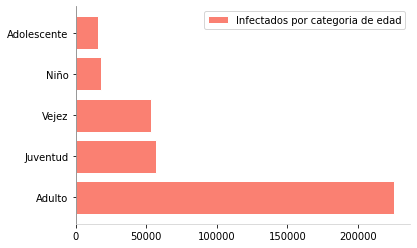

In [ ]:
# Visualización de categorias por edad
Data = Dataset_ciudades['Cat_Edad'].value_counts()
r1 = np.arange(len(Data))
plt.barh(r1, Data, color='salmon', 
         edgecolor='white' , 
         label = 'Infectados por categoria de edad')
plt.yticks([r for r in range(len(Data))] , Data.index, rotation = 'horizontal')
plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("lightgray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.legend()
plt.show()




---



---


Por último se visualiza para los casos importados, que países son los que más casos han aportado a nuestro país, se observa que España y Estados Unido son los paises que mas aportan por una gran diferencia respecto a los demás países. 

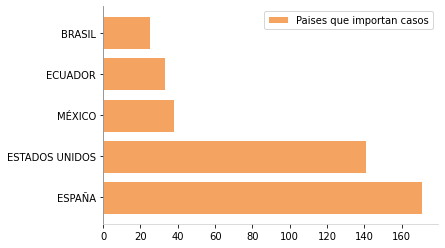

In [ ]:
#Casos importados vs contraidos en territorio nacional
Data = Dataset_ciudades['País de procedencia'].value_counts()[:5]
r1 = np.arange(len(Data))
plt.barh(r1, Data, color='sandybrown', 
         edgecolor='white', 
         label = 'Paises que importan casos')
plt.yticks([r for r in range(len(Data))] , Data.index, rotation = 'horizontal')
plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("lightgray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.legend()
plt.show()

## Datasets y Análisis Exploratorio de Fallecidos


Para responder el problema de analítica se necesita de filtrar el dataset para aquellos infectados fallecidos 


In [ ]:
# Se crea un Subset en el que solo se tenga en cuenta las personas fallecidas,
# para las 5 ciudades mas importantes. 

Dataset_fallecidos = Dataset_ciudades[Dataset_ciudades['Atención'] == 'Fallecido']
Dataset_fallecidos.shape

(10306, 13)



---



---


Se encuentra que la distribución de fallecidos respecto a sexo, difiere considerablemente de la distribución de infectados, ya que aunque el primero era totalmente equitativo, en este se ve una predominancia de los hombres, esto se asocia tanto  a razones genéticas expresadas en la literatura,como a razones sociales en menor medida, ya que los hombres pueden incurrir en mayores descuidos respecto al cuidado del virus

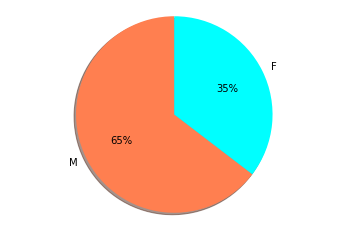

In [ ]:
# Análisis basico de los fallecidos 

# Distribucion por sexo de pacientes
tamaño = Dataset_fallecidos['Sexo'].value_counts()
labels = Dataset_fallecidos['Sexo'].value_counts().index
fig1, ax1 = plt.subplots()
ax1.pie(tamaño, labels=labels, autopct='%1.f%%',
        shadow=True, startangle=90 ,colors = ['coral' , 'aqua'])
ax1.axis('equal')  # Equal asegura que el diagrama sea circular.
plt.show()



---



---


Se puede observar que la ciudad con mayor cantidad de fallecidos es nuestra capital Bogotá, lo que es lógico debido al tamaño y densidad poblacional de la ciudad con  7.4 M de habitantes. Sin embargo el segundo dato resulta curioso, ya que es Barranquilla la ciudad que le sigue en cantidad de fallecidos, la cual tiene menor cantidad de habitantes (1.2 M) que Cali (2.2 M) o Medellín (2.4M). Esto se puede deber a distribucion de la población, problemas en el sistema de salud, o a cuestiones culturales respecto al manejo personal de cuidados contra el Covid-19


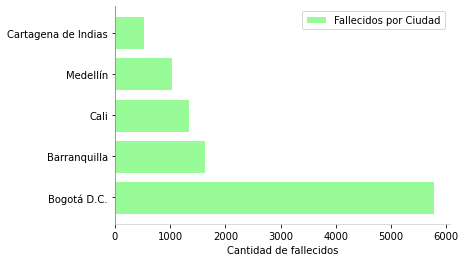

In [ ]:
#Análisis de fallecidos por ciudad
Data = Dataset_fallecidos['Ciudad de ubicación'].value_counts()
r1 = np.arange(len(Data))
plt.barh(r1, Data, color='palegreen', 
         edgecolor='white' ,
         label = "Fallecidos por Ciudad")
plt.yticks([r for r in range(len(Data))] , Data.index, rotation = 'horizontal')
plt.xlabel("Cantidad de fallecidos")
plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("lightgray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.legend()
plt.show()



---



---


En la distribución por rango de edad se observa claramente que la teoría de que los adultos mayores son mas susceptibles a fallecer por la enfermedad es cierta, ya que la mayoria de fallecidos está entre aquellos mayores a 59 años, teniendo una gran cantidad también en la categoría de adultos que cubre entre los 29 y 59 años. 

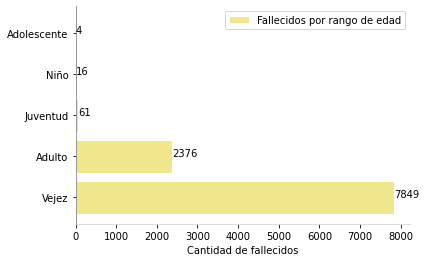

In [ ]:
Data = Dataset_fallecidos['Cat_Edad'].value_counts()
r1 = np.arange(len(Data))
plt.barh(r1, Data, color='khaki', 
         edgecolor='white' , 
         label = "Fallecidos por rango de edad")
plt.yticks([r for r in range(len(Data))] , Data.index, rotation = 'horizontal')
plt.xlabel("Cantidad de fallecidos")
plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("lightgray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

for index, value in enumerate(Data):
    plt.text(value, index, str(value))
plt.legend()
plt.show()

## Dataset y modelado para predicción

A continuación se hace un agrupamiento para conocer la cantidad de fallecidos por fecha, se crean dos datasets, uno que va de dia en dia, y otro que va de semana en semana

Creación de datset por día, que será utilizado para entrenar un modelo que hará una predicción por día

In [ ]:
# Se agrupa por Fecha de Muerte para conocer la cantidad de fallecidos por día
Fallecidos_por_Fecha = Dataset_fallecidos.groupby("Fecha de muerte")['Sexo'].count().reset_index()
Fallecidos_por_Fecha.tail(10)

,Fecha de muerte,Sexo
157,2020-08-25,60
158,2020-08-26,59
159,2020-08-27,30
160,2020-08-28,37
161,2020-08-29,38
162,2020-08-30,12
163,2020-08-31,36
164,2020-09-01,26
165,2020-09-02,25
166,2020-09-03,12


Se encuentran dos problemas con la data

*   Las fechas se saltan los valores en que no hubo muertos (fallecido  = 0), y estos datos pueden resultar relevantes para el dataset
*   La columna de Sexo en realidad deberia llamarse "Fallecidos"

In [ ]:
# Se realiza un cambio de tipo de la columna fechas a str, ya que este tipo es necesario par aun proceso de merge posterior.

Fallecidos_por_Fecha['Fecha de muerte'] = Fallecidos_por_Fecha['Fecha de muerte'].astype(str)
Fallecidos_por_Fecha.columns = ['Fecha' , 'Fallecidos']


In [ ]:
#Para solucionar la falta de fechas, se realiza el siguiente procedimiento

#Se crean fechas iniciales y finales
#Para definir la fecha del día final, se toma el ultimo valor del dataset, y se separa en sus componentes

Año = int((str(Fallecidos_por_Fecha['Fecha'][-1:]).split('-')[0]).split('    ')[1])
Mes = int(str(Fallecidos_por_Fecha['Fecha'][-1:]).split('-')[1])
Dia = int(str(Fallecidos_por_Fecha['Fecha'][-1:]).split('-')[2][0:2])

# Se crean valores para la fecha inicial (que siempre es la misma) y la fecha final del dataset
Fecha_inicial = datetime(2020,3,16 )
Fecha_final =  datetime(Año,Mes,Dia)

#Se crea un listado de fechas que contenga todos los días sin saltarse ninguno
Lista_fechas = []
fecha = Fecha_inicial
days = 0 
while fecha < Fecha_final:
  fecha = Fecha_inicial +  timedelta(days)
  days += 1 
  Lista_fechas.append(fecha)

#Se crea un dataset que contenga el listado de fechas completas
Df_fechas = pd.DataFrame(Lista_fechas)

#Se redefine el tipo de las fechas para poder hacer un Merge y se renombra 
Df_fechas[0] = Df_fechas[0].astype(str)
Df_fechas.columns = ['Fecha']

#Se crea un Dataset final de fechas que contiene el Merge del dataset creado y el de fechas de fallecidos
Fechas_final = Df_fechas.merge(Fallecidos_por_Fecha , on= 'Fecha' , how = 'left')
Fechas_final.fillna(0,inplace=True)

#Se cambia el tipo de la columna fallecidos a Int
Fechas_final['Fallecidos'] = Fechas_final['Fallecidos'].astype(int)

Se crea a continuación un DataSet final, que va a tener las columnas de fallecidos hoy, fallecidos ayer, la diferencia entre estas dos, y por último fallecidos mañana, que será la columna target que el modelo ha de predecir

In [ ]:
#Se convierte la columna de fallecidos en fallecidos hoy, para poder identificarla despues del shift
Fechas_final.columns = ['Fecha' , 'Fallecidos hoy']

#Se crean las columnas de fallecidos de ayer y fallecidos de mañana respectivamente

Fechas_final['Fallecidos ayer'] = Fechas_final['Fallecidos hoy'].shift(periods = 1)
Fechas_final['Fallecidos mañana'] = Fechas_final['Fallecidos hoy'].shift(periods = -1)

#Se visualiza a continuación el dataset con las columnas necesarias para la predicción
Fechas_final['Diferencia_hoy_ayer'] = Fechas_final['Fallecidos hoy'].diff()

In [ ]:
Fechas_final

,Fecha,Fallecidos hoy,Fallecidos ayer,Fallecidos mañana,Diferencia_hoy_ayer
0,2020-03-16,1,NaN,0.0,NaN
1,2020-03-17,0,1.0,0.0,-1.0
2,2020-03-18,0,0.0,0.0,0.0
3,2020-03-19,0,0.0,2.0,0.0
4,2020-03-20,2,0.0,0.0,2.0
...,...,...,...,...,...
167,2020-08-30,12,38.0,36.0,-26.0
168,2020-08-31,36,12.0,26.0,24.0
169,2020-09-01,26,36.0,25.0,-10.0
170,2020-09-02,25,26.0,12.0,-1.0


A partir del dataset diario,se crea un subset que contiene los datos segun la cantidad de días que se desee que pase entre fila y fila, con la función Dataset_por_tiempo


In [ ]:
#Se crea una función donde se ingresa el dataset base del que se va a tomar, 
# y el número de días que han de transcurrir entre fecha y fecha
def Dataset_por_tiempo(Df_base, days):

    Df = pd.DataFrame()
    for i in range(1, Df_base.index.size, days):
      Df = Df.append(Df_base.loc[[i]])

    Df = Df.reset_index(drop = True)

    Df['Diferencia_hoy_ayer'] = Df['Fallecidos hoy'].diff()
    
    return Df

## Predicción con Random Forest
Se realizan pruebas con varios modelos de regresión y se encuentra que el modelo de Random Forest básico otorga resultados adecuados para el modelamiento del corto-medio plazo, además en la literatura se encuentra que este modelo es utilizado en series de tiempo para predicción de casos a futuro. 

El modelo utiliza parámetros de profundidad máxima de 40, ya que después de probar varias profundidades se encuentra que por encima de esta el cambio no es significativo y por debajo de esta el modelo no predice algo con sentido.


In [ ]:
"""Se define una función de preprocesamiento, que trata el dataframe,
 y otorga el set de entrenamiento y testeo"""

def Preprocesamiento(df):

    """Reorganizo el dataset dejando como columna final la columna de predicción
       que serán los fallecidos de mañana"""
    df = df[['Fallecidos hoy','Fallecidos ayer',
             'Diferencia_hoy_ayer','Fallecidos mañana']]
          

    """Se quitan la primera fila y ultima fila ya que no se puede tratar con los
       valores NaN , además de las ultimas 5 filas restantes del dataset
       ya que se observa que el reporte de datos en estos días varía mucho y 
       no es aportante para modelo"""
    df = df.iloc[1:-4]

    """Para definir el set de entrenamiento se toma el 90% inicial como train
       y el 10% final como test"""

    Var_90 = int(df.index.size*0.90)

    X = df.drop(['Fallecidos mañana'] , axis = 1)
    y = df['Fallecidos mañana'] # Predicción 
        
    X_train = (X[X.index < Var_90]).astype(int)
    y_train = (y[y.index < Var_90]).astype(int)             
        
    X_test = (X[X.index >= Var_90]).astype(int)    
    y_test = (y[y.index >= Var_90]).astype(int)

    plt.plot(y_train.index , y_train, 
             label = "Set de entrenamiento", 
             color = 'seagreen')
    plt.plot(y_test.index , y_test, 
             label = "Set de testeo",
             color = 'limegreen')    
    plt.xlabel('Días desde inicio de la pandemia')
    plt.ylabel('Cantidad de fallecidos')
    plt.legend()
    plt.show()    

    return X_train, y_train, X_test, y_test

In [ ]:
def modeltrain(X_train, y_train, X_test, y_test, estimadores, features):

    from sklearn.ensemble.forest import RandomForestRegressor

    # Generando el modelo 
    RF_Model = RandomForestRegressor(n_estimators=estimadores,
                                    max_features=features)


    # Ajustando el modelo con X_train y y_train
    rgr = RF_Model.fit(X_train, y_train)

    y_train_predict = (rgr.predict(X_train)).astype(int)
    y_test_predict = (rgr.predict(X_test)).astype(int)

    """Graficando el 90% real, y el 10% tanto de testing como de predicción, 
    para encontrar el ajuste gráfico"""

    #Gráfica del 90% real
    plt.plot(y_train.index , y_train, label = "90% Real", color = 'seagreen')
    plt.plot(y_test.index, y_test, label = "10% Testeo", color = 'limegreen')    
    plt.plot(y_test.index, y_test_predict, label = "10% Predicho",color = 'indianred')
    plt.xlabel('Días desde inicio de la pandemia')
    plt.ylabel('Cantidad de fallecidos')

    plt.legend()
    plt.show()

    return y_train_predict ,  y_test_predict , rgr

Predicción de los siguientes X días:

Se define la función "prediction" ,  la cual toma el datase original, el X_test, los días a futuro a predecir, y el modelo ya entrenado

In [ ]:
def prediction(df, X_testing , days, model):

      # Se define un dataset donde se adicionaran
      Data_prediccion = X_testing.iloc[[-1]]
      list_tomorrow = []
      index_list = []
      for i in range(days):
        index_list.append(df.index.size + i)
        tomorrow = model.predict(Data_prediccion.iloc[[-1]]).astype(int)[0]
        list_tomorrow.append(tomorrow)
        ayer = Data_prediccion.iloc[-1, 0]
        Diff = tomorrow-ayer
        Data_prediccion = Data_prediccion.append({"Diferencia_hoy_ayer" : Diff , "Fallecidos ayer" : ayer , "Fallecidos hoy" : tomorrow}, 
                                                ignore_index=True)
      Prediccion_df = pd.DataFrame(index = index_list , data = list_tomorrow, columns = ["Fallecidos_predict"])

      y = df['Fallecidos mañana']

      
      plt.plot(y.index , y, label = "Real", color = 'seagreen')
      plt.plot(index_list, list_tomorrow, label = "Predicción", color = 'red')
      plt.xlabel('Días desde inicio de la pandemia')
      plt.ylabel('Cantidad de fallecidos')
      plt.legend()
      plt.show()

      return Prediccion_df , list_tomorrow

## Predicción por día


Se observa la división entre el set de entrenamiento que contiene el 90% inicial de los datos, y el set de testeo, que contiene el 10% restante,la división se realiza de manera continua y no aleatoria, por ser una predicción de serie de tiempo


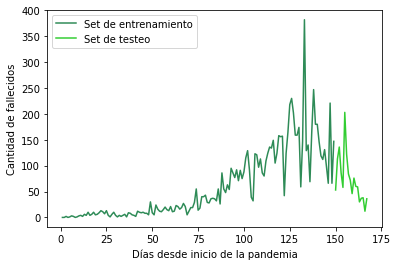

In [ ]:
# Procedimiento para dataset por Día

X_train_dia, y_train_dia, X_test_dia, y_test_dia = Preprocesamiento(Fechas_final)



---



---


Se realiza un entrenamiento del modelo con el set de entrenamiento que contiene el 90% inicial. Y se realiza la predicción para el set de testing, se observa que en la figura en verde la predicción, aun cuando no tiene una precisión alta, mantiene claramente la tendencia de los datos reales







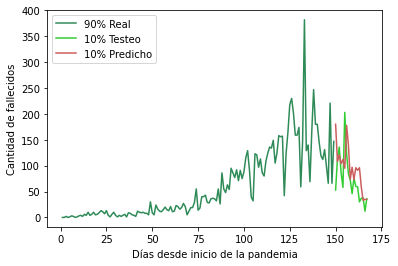

In [ ]:
# Entrenamiento y visualización del comportamiento en el set de testing
y_train_predict_dia ,  y_test_predict_dia , rgr_dia = modeltrain(X_train_dia,
                                                                 y_train_dia,
                                                                 X_test_dia, 
                                                                 y_test_dia, 
                                                                 40,
                                                                 1)



---


Se puede observar que de la métrica de error cuadrático medio se obtiene un error alto, más en este caso, se decide continuar debido a que se desea que el modelo contenga una tendencia similar a la tendencia real, no que sea una predicción exacta. Y como se puede observar en la figura superior, la tendencia bajista de los últimos datos es tomada con efectividad por parte del modelo


In [ ]:
 from sklearn.metrics import mean_squared_error

 mean_squared_error(y_test_dia, y_test_predict_dia , squared = False)

51.51752668321292



---



---


Por último se realiza la predicción para los siguientes 15 días, se observa que el modelo indica un nuevo incremento en los casos (aunque en diferentes corridas con las mismas variables puede cambiar su pendiente). Se cree que el modelo aun cuando no es preciso, puede estar prediciendo una tendencia de crecimiento en los casos de fallecidos. Con el entrenamiento pudo haber aprendido que de pocos casos se empieza a pasar a un incremental de casos como sucede alrededor de los 90 días en la data real. Esto puede verse acorde con la reapertura económica realizada en el mes de septiembre, que con una alta probabilidad aumentará el numero de casos, y con esto el número de fallecidos

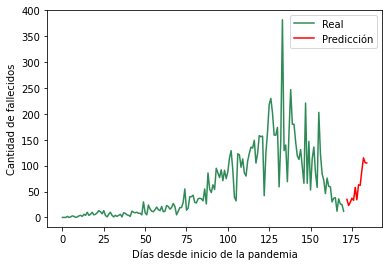

In [ ]:
Predicción_dia , lista_mañana = prediction(Fechas_final, X_test_dia , 13 , rgr_dia)

Se puede observar que después de alrededor de 13 días, la predicción pierde su valor, ya que alcanza un estado estacionario, donde los valores nuevos que se le agregan al modelo no influyen para las predicciones. 

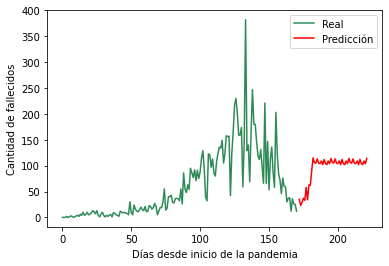

In [ ]:
Predicción_dia = prediction(Fechas_final, X_test_dia , 50 , rgr_dia)

## Predicción por semana

Para la predicción por semana  se realiza el procedimiento de tomar el dataset inicial de Fechas_final, y tomar los datos cada 7 días

In [ ]:
Df_semanal = Dataset_por_tiempo(Fechas_final, days = 7)
Df_semanal.head()

,Fecha,Fallecidos hoy,Fallecidos ayer,Fallecidos mañana,Diferencia_hoy_ayer
0,2020-03-17,0,1.0,0.0,NaN
1,2020-03-24,2,3.0,0.0,2.0
2,2020-03-31,4,6.0,10.0,2.0
3,2020-04-07,9,6.0,13.0,5.0
4,2020-04-14,6,1.0,10.0,-3.0


Se realiza la división del dataset en entrenamiento y testing. 

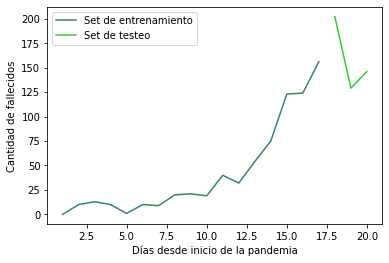

In [ ]:
X_train_semana, y_train_semana, X_test_semana, y_test_semana = Preprocesamiento(Df_semanal)

Se observa la predicción del modelo en la data de testeo, es claro que no es para nada adecuada, esto es muy probablemente a la reducción en la cantidad de datos al recortar el dataset de días a semanas. 

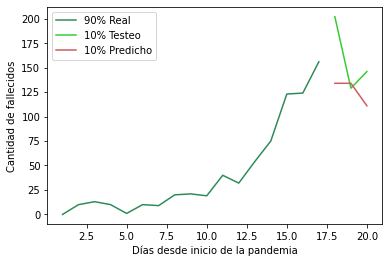

In [ ]:
y_train_predict_semana ,  y_test_predict_semana , rgr_semana = modeltrain(X_train_semana, 
                                                                          y_train_semana,
                                                                          X_test_semana, 
                                                                          y_test_semana,
                                                                          100,
                                                                          1)

Se observa que la predicción en este caso resulta más pobre que la realizada por día con el dataset completo,  hay una especia de estabilid con una ligera tendencia de aqui a 10 semanas, es decir un mes


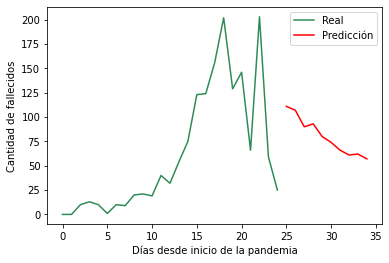

In [ ]:

Predicción_semana = prediction(Df_semanal, X_test_semana , 10 , rgr_semana)

## Conclusiones

*   En la sección de análisis exploratorio se encuentran  2 datos curiosos, el primero que la distribución de hombres y mujeres esta llegando a una estabilidad de 50/50 infectados, pero la distribución de fallecidos es de 65% para hombres y 35% para mujeres. Lo que indica una tasa de mortalidad mayor para los hombres, como se ha mencionado en noticias y literatura.
*   Se encuentra que la distribución de infectados y fallecidos por ciudades corresponde en cierta medida al tamaño por ciudad, excepto en Barranquilla, donde a pesar de tener una población menor que Medellín y Cali, presenta mayor cantidad de infectados y fallecidos, esto asociado a problemas en el sistema de salud, cantidad de UCIs disponibles, y a la forma en que la sociedad afronta el distanciamiento social.
*   Se observa que el modelo de predicción funciona mejor con la tendencia mientras mas datos tenga para entrenar, como sucede en el caso del dataset inicial que esta dividido por días, en cambio el de semana tiene un ajuste mucho mas pobre, debido a la reducción de la cantidad de días.
*    El modelo de predicción muestra una tendencia alcista para los siguientes 15 días, que puede ser asociada al momento del entrenamiento en que se pasa de pocos casos al día a un  incremento significativo (alrededor del día 90 en los datos reales). Esto puede atribuirse en la realidad a la reapertura económica que nos encontramos viviendo, que aunque necesaria en terminos económicos, va a crear un incremento en la cantidad de infecatdos y fallecidos nuevamente.
*   La predicción al largo plazo no fue posible de ser obtenida de manera adecuada en este caso, ya que el modelo óptimo se comporta bien hasta 13 días en el futuro, viendo los datos de la predicción semanal, se encuentra que posterior a un período de inicial de alza, 10 semanas después el modelo predice una nueva caida de los casos, lo que puede deberse a que el segundo pico de casos puede resultar mucho más bajo que el primero, debido al establecimiento de medidas permanentes de distanciamiento social y bioseguridad


In [ ]:
scipy==1.5.2